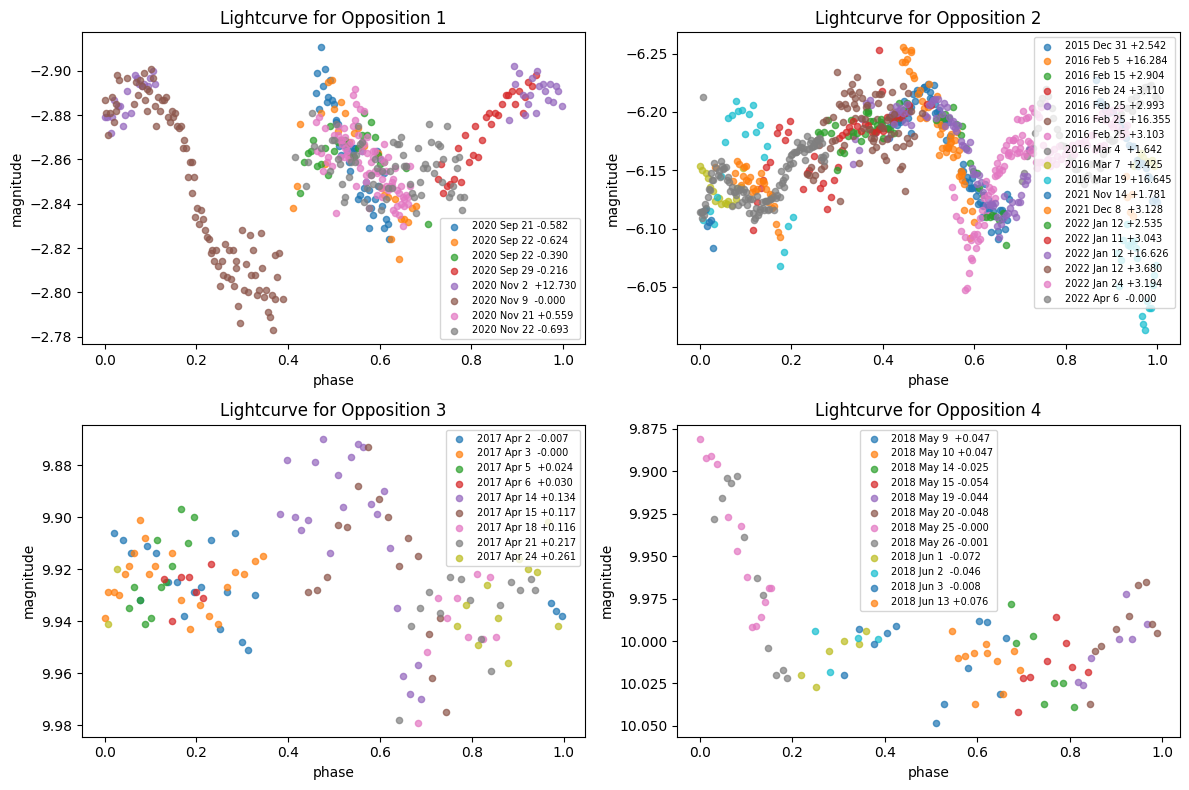

In [4]:
import matplotlib.pyplot as plt
import os

def read_blocks(file_path):
    blocks = []
    current_block = {"x": [], "y": [], "label": None}
    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()
            if line and any(month in line for month in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]):
                if current_block["x"]:
                    blocks.append(current_block)
                    current_block = {"x": [], "y": [], "label": None}
                current_block["label"] = line
            else:
                try:
                    parts = line.split()
                    if len(parts) == 2:
                        x, y = map(float, parts)
                        current_block["x"].append(x)
                        current_block["y"].append(y)
                except Exception:
                    continue
    if current_block["x"]:
        blocks.append(current_block)
    return blocks

# Prepare file names and titles
files = [f"composit{i}.txt" for i in range(1, 5)]
titles = [f"Lightcurve for Opposition {i}" for i in range(1, 5)]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # A4 size in inches (portrait)

for idx, (file, title) in enumerate(zip(files, titles)):
    ax = axes[idx // 2, idx % 2]
    if not os.path.exists(file):
        ax.set_title(f"File not found: {file}")
        ax.axis('off')
        continue
    blocks = read_blocks(file)
    for block in blocks:
        ax.scatter(block["x"], block["y"], label=block["label"], s=20, alpha=0.7)
    ax.set_xlabel("phase")
    ax.set_ylabel("magnitude")
    ax.set_title(title)
    ax.legend(fontsize=7, loc="best")
    ax.invert_yaxis()  # Magnitude: brighter is up

plt.tight_layout()
plt.savefig("composite_lightcurves.pdf", dpi=600, bbox_inches='tight')